## KNN fruit detection

<table style="margin-left:0; text-align:left;">
<tr><td><b>Author(s):</b></td><td>Mahbub Alam</td></tr>
</table>


## Introduction

k-nearest neighbor classifier.

A small script that trains and evaluates a k-nearest neighbors classifier for
fruit detection.


#### Purpose

- Load features/labels for fruit images.
- Train a KNN classifier and evaluate accuracy/metrics.
- Predict on new images.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # importing classifier constructor
import warnings
warnings.filterwarnings("ignore", message="Creating legend with loc=")

fruits = pd.read_table('fruit_data_with_colors.txt')

print(fruits.head())

# print(fruits.columns) # Output: ['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score']

print(f"")

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79



## check missing data

 

In [2]:
missing_data = fruits.isna().any()  # returns bool on columns
cols_with_nan = fruits.columns[missing_data].to_list()
print(f"")

## fruit label and name dictionary

 

In [3]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
# print(lookup_fruit_name) # Output: {1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## train test split

 

In [4]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

## learning with KNN classifier

 

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

print(f"Accuracy score: {knn.score(X_test, y_test)}")


example_fruits = pd.DataFrame([[20, 4.3, 5.1], [180, 7.8, 8.3]], columns = X.columns)
fruit_predictions = knn.predict(example_fruits)
print([lookup_fruit_name[label] for label in fruit_predictions])

Accuracy score: 0.5333333333333333
['mandarin', 'apple']


## decision boudaries for KNN classifier

 

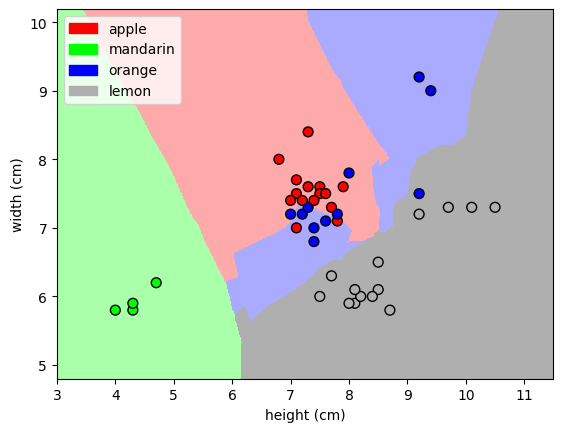

In [6]:
from utils import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')

## classifier accuracy vs k

 

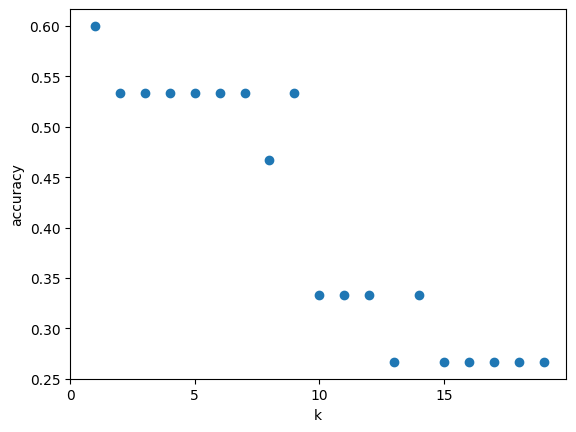

In [7]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.scatter(k_range, scores)
# Axis labels and title
plt.xlabel("k")
plt.ylabel("accuracy")
plt.xticks(range(0, 20, 5))
plt.savefig('knn_accuracy_vs_k.jpg')
plt.show()

## classifier accuracy vs train/test split

 

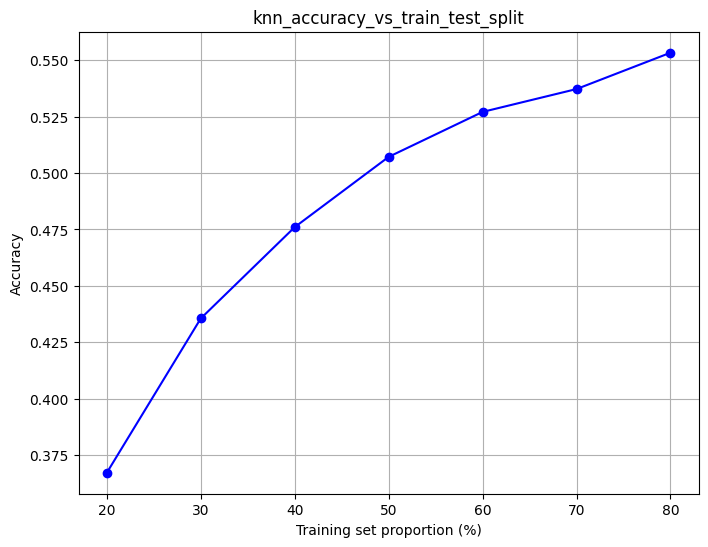

In [8]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

file_name = 'knn_accuracy_vs_train_test_split'

train_props = []
avg_scores = []

for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))

    train_props.append(s * 100)  # Convert to percentage
    avg_scores.append(np.mean(scores))

plt.figure(figsize=(8, 6))
plt.plot(train_props, avg_scores, 'bo-')  # Line with points
plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy')
plt.title(file_name)
plt.grid(True)
plt.savefig(f'{file_name}.jpg')
plt.show()